This notebook will provide you the basic concepts used in RDkit and its functionalites.

To run the notebook in Google Colab.[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/samdani1593/samdani1593.github.io/blob/main/posts/2023-04-23-RDkit-cheatsheet.ipynb)



# Install Dependecies

In [ ]:
#@title **Install Conda Colab**
#@markdown The kernel will be restarted after conda colab installed
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
#@title **Install RDkit and mols2grid**
!conda install -c conda-forge -y rdkit mols2grid 

In [ ]:
#@title *Download Input files*
%%bash
mkdir data
cd data
DATA_DIR_PATH='https://raw.githubusercontent.com/samdani1593/samdani1593.github.io/main/posts/data'
for f in 'CHEMBL559147.sdf' 'Multiple_smiles.smi' 'Multiple_SDF_compounds.sdf' 'Multiple_SDF_compounds.sdf.gz' 'example_compounds.sdf' 'MAPK2_chembl.csv' 'MAPK2.smi' 'lig.pdb'
do
    wget $DATA_DIR_PATH/"$f"
done


In [1]:
#@title **Import modules**
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import RDConfig
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import Image
IPythonConsole.ipython_useSVG = True
import mols2grid
import os,sys
import rdkit
print(rdkit.__version__)

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol


2022.03.3


For more information on RDKit can be found [here](https://www.rdkit.org/docs/GettingStartedInPython.html)

# Read molecules

For reading different files into RDkit
* Chem.MolFromMolFile (From SDF file)
* Chem.MolFromPDBFile (From PDB file)
* Chem.MolFromSmarts (From smarts as string text)
* Chem.MolFromSmiles (From smiles as string text)
* Chem.MolFromMol2File (MOL2 file only tripos mol2 file format accepted)

For reading multiple files:
* Chem.SmilesMolSupplier
* Chem.SDMolSupplier


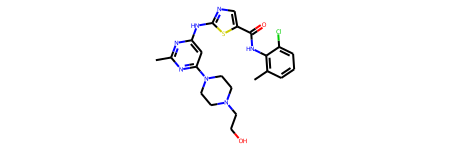

In [2]:
#@title **Reading Single smiles**
m = Chem.MolFromSmiles('Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1') #Reading smiles from text
m #RDkit mol object file

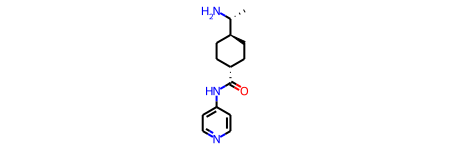

In [3]:
#@title **Reading single sdf**
m = Chem.MolFromMolFile('data/CHEMBL559147.sdf') #Reading sdf file containing one compound
m

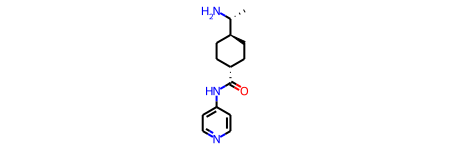

In [4]:
#@title **Reading sdf file containing one compound as read object**
stringWithMolData = open('data/CHEMBL559147.sdf').read() 
m = Chem.MolFromMolBlock(stringWithMolData)
m

In [5]:
#@title **Reading Multiple smiles**
mollist=[]
with Chem.SmilesMolSupplier('data/Multiple_smiles.smi') as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mollist.append(mol) #append all the molecules into mollist
print(f"Total number of molecules: {len(mollist)}")
#the inputmol is reading one molecule lesser than the actual one when there is no header kindly check and confirm while using it

Total number of molecules: 3


In [6]:
#@title **Reading large smiles with multithreading**
mollist=[]
with Chem.MultithreadedSmilesMolSupplier('data/Multiple_smiles.smi') as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mollist.append(mol) #append all the molecules into mollist
print(f"Total number of molecules: {len(mollist)}")
#the inputmol is reading one molecule lesser than the actual one when there is no
#header kindly check and confirm while using it

Total number of molecules: 3


In [7]:
#@title **Reading multiple sdf files**
mollist=[]
with Chem.SDMolSupplier('data/Multiple_SDF_compounds.sdf') as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mollist.append(mol) #append all the molecules into mollist
print(f"Total number of molecules: {len(mollist)}")

Total number of molecules: 14


In [8]:
#@title **Reading multiple SDF files gz**
import gzip
mollist=[]
infile = gzip.open('data/Multiple_SDF_compounds.sdf.gz') #gzip read object
with Chem.ForwardSDMolSupplier(infile) as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mollist.append(mol) #append all the molecules into mollist
print(f"Total number of molecules: {len(mollist)}")

Total number of molecules: 14


In [9]:
#@title **Reading large sdf file with multithreading**
#Multithreading large sdf file not working and making kernel dead
mollist=[]
with Chem.MultithreadedSDMolSupplier('data/Multiple_SDF_compounds.sdf') as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mollist.append(mol) #append all the molecules into mollist
print(f"Total number of molecules: {len(mollist)}")

Total number of molecules: 14


# Compute 2D coordinates

In [10]:
inputmol = Chem.MolFromSmiles('Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1') #Reading smiles from text
inputmol.SetProp('_Name','Dasatinib') #Setting molecule name
inputmol_H = Chem.AddHs(inputmol) #Adding H's for generating coordinates
AllChem.Compute2DCoords(inputmol_H) #Calculating 2D coordinate generation
print(Chem.MolToMolBlock(inputmol_H)) #Printing as MolBlock

Dasatinib
     RDKit          2D

 59 62  0  0  0  0  0  0  0  0999 V2000
   -7.0481   -1.4814    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.7453   -0.7380    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.7377    0.7620    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4349    1.5054    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4273    3.0054    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1245    3.7488    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9602    5.2398    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4914    5.5442    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7480    4.2414    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7430    4.0771    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6308    5.2861    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3462    2.7037    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.8372    2.5394    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.4403    1.

# Compute 3D coordinates

In [11]:
inputmol = Chem.MolFromSmiles('Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1') #Reading smiles from text
inputmol.SetProp('_Name','Dasatinib') #Setting molecule name
inputmol_H = Chem.AddHs(inputmol) #Adding H's for generating coordinates
AllChem.EmbedMolecule(inputmol_H,randomSeed=0xf00d) #Calculating 3D coordinate generation, randomeseed for reproducibility
#inputmol_noH = AllChem.RemoveHs(inputmol_H) #For removing H's
AllChem.MMFFOptimizeMolecule(inputmol_H,maxIters=5000) #For minimization
print(Chem.MolToMolBlock(inputmol_H)) #Printing as MolBlock

Dasatinib
     RDKit          3D

 59 62  0  0  0  0  0  0  0  0999 V2000
   -0.4045   -0.7912    3.2702 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9754   -0.2612    1.9929 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1123    0.1246    1.0427 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6258    0.5522   -0.1173 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2085    0.9493   -1.1879 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5566    0.8185   -1.2271 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3066    1.7404   -1.7953 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.6381    1.3781   -1.7449 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9084    0.1461   -1.1862 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1688   -0.5489   -0.9829 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2784   -1.5300   -0.2541 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.2135   -0.0354   -1.7383 N   0  0  0  0  0  0  0  0  0  0  0  0
    7.5602   -0.4876   -1.7444 C   0  0  0  0  0  0  0  0  0  0  0  0
    8.2790   -0.

# write molecules

For writing many molecules:
* Chem.SDWriter (For saving in sdf file)
* Chem.SmilesWriter (For saving in smiles file)
* Chem.PDBWriter (For saving in smiles file)

For single molecule
* Chem.MolToMolFile (For saving sdf file)
* Chem.MolToPDBFile (For saving pdb file)
* Chem.MolToSmiles (For saving smiles file)


In [12]:
# object to text
inputmol = Chem.MolFromMolFile('data/CHEMBL559147.sdf') #Reading single sdf file containing one cmpd
#inputmol is rdkit object
Chem.MolToSmiles(inputmol) #printing smiles as text from rdkit object

'C[C@@H](N)[C@H]1CC[C@H](C(=O)Nc2ccncc2)CC1'

In [13]:
# object to text
inputmol = Chem.MolFromMolFile('data/CHEMBL559147.sdf') #Reading single sdf file containing one cmpd
#inputmol is rdkit object
Chem.MolToSmiles(inputmol,isomericSmiles=False) #For printing smiles without isomeric smiles

'CC(N)C1CCC(C(=O)Nc2ccncc2)CC1'

In [14]:
inputmol = Chem.MolFromSmiles('CC(O)c1ccccc1')
Chem.Kekulize(inputmol) #For Kekulization
Chem.MolToSmiles(inputmol,kekuleSmiles=True) #For printing Kekules smiles

'CC(O)C1=CC=CC=C1'

In [15]:
inputmol = Chem.MolFromSmiles('CC(O)c1ccccc1')
inputmol.SetProp("_Name","Mymolecule1") # For setting molecule name under "_Name" property
print(Chem.MolToMolBlock(inputmol)) # For printing as sdf file

Mymolecule1
     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9  4  1  0
M  END



Writing multiple smiles

In [16]:
# Writing multiple smiles to a file
mollist=[]
with Chem.SmilesMolSupplier('data/Multiple_smiles.smi') as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mollist.append(mol)
with Chem.SmilesWriter('data/Smiles_output.smi') as w: #smiles writer
    for mol in mollist:
        w.write(mol)

In [17]:
# Storing multiple smile to a string object
mollist=[]
with Chem.SmilesMolSupplier('data/Multiple_smiles.smi') as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mollist.append(mol)
# Creating string file obect and saving to it as object
from rdkit.six import StringIO
sio=StringIO() #string object
with Chem.SmilesWriter(sio) as w: #smiles writer saving to string object
    for mol in mollist:
        w.write(mol)
print(sio.getvalue())

SMILES Name 
CC(=O)Oc1ccccc1C(=O)O ZINC000000000053
C/C(O)=N\c1ccc(O)cc1 ZINC13550868
C=CCc1ccc(OC(=O)c2ccccc2OC(C)=O)c(OC)c1 ZINC103282979



## Writing SDF file

In [18]:
# Writing multiple sdf to a file
mollist=[]
with Chem.SmilesMolSupplier('data/Multiple_smiles.smi') as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mol_H = Chem.AddHs(mol) # Add H's
        AllChem.EmbedMolecule(mol_H,randomSeed=0xf00d) # Generate 3D coordinate
        AllChem.MMFFOptimizeMolecule(mol_H,maxIters=5000) #Minimization
        mollist.append(mol_H)
with Chem.SDWriter('data/SDF_output.sdf') as w: #SDF writer to a file
    for mol in mollist:
        w.write(mol)

In [19]:
# Writing to string file object
mollist=[]
with Chem.SmilesMolSupplier('data/Multiple_smiles.smi') as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mol_H = Chem.AddHs(mol) # Add H's
        AllChem.EmbedMolecule(mol_H,randomSeed=0xf00d) # Generate 3D coordinate
        AllChem.MMFFOptimizeMolecule(mol_H,maxIters=5000) #Minimization
        mollist.append(mol_H)
# Creating string file obect and saving to it as object
from rdkit.six import StringIO
sio=StringIO() #string object
with Chem.SDWriter(sio) as w: #smiles writer saving to string object
    for mol in mollist:
        w.write(mol)
print(sio.getvalue())

ZINC000000000053
     RDKit          3D

 21 21  0  0  0  0  0  0  0  0999 V2000
    3.2984   -0.5954   -0.4335 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.9108   -0.6489    0.1326 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.6503   -0.9278    1.2956 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.0037   -0.3477   -0.8763 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3172   -0.3310   -0.4227 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0679   -1.4882   -0.6656 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4009   -1.5490   -0.2633 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9859   -0.4544    0.3699 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2399    0.7066    0.5940 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8964    0.7879    0.1911 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2025    2.0744    0.4499 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6719    3.0100    1.0749 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.0202    2.1773   -0.0981 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.021

# Conformer generation

In [20]:
# From single smile text
inputmol = Chem.MolFromSmiles('Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1') #Reading smiles from text
inputmol.SetProp('_Name','Dasatinib') #Setting molecule name
inputmol_H = Chem.AddHs(inputmol) #Adding H's for generating coordinates
#inputmol_noH = AllChem.RemoveHs(inputmol_H) #For removing H's
AllChem.EmbedMolecule(inputmol_H, randomSeed=0xf00d) # 3D Coordinate generation
conformers_id = AllChem.EmbedMultipleConfs(inputmol_H, numConfs=10) #inputmol_H will contain the conformers
#conformers_id will contain index of the conformers stored in inputmol_H
# For minimizinf each entry in loop 
# for f in mol_conformers:
#     AllChem.MMFFOptimizeMolecule(inputmol_H, confId=f)
#mol_conformers = AllChem.EmbedMultipleConfs(inputmol_H, numConfs=10, pruneRmsThresh=1) #prineRMSThresh is for removing the conformers based on RMS
# # For obtaining RMS for conformers generated
# rmslist = []
# AllChem.AlignMolConformers(inputmol_H, RMSlist=rmslist)
# print(rmslist)
# AllChem.EmbedMultipleConfs(inputmol_H, randomSeed=0xf00d, numThreads=1) #Calculating 3D coordinate generation for all the conformers
AllChem.MMFFOptimizeMoleculeConfs(inputmol_H,maxIters=5000, numThreads=1) #For minimization
with Chem.SDWriter('data/Conformers_output.sdf') as w:
    for cid in conformers_id:
        inputmol_H.SetProp('_Name',inputmol.GetProp('_Name')+'_'+str(cid)) # Get original compound name and add conformer id at the end.
        w.write(inputmol_H, confId=cid)
# print(Chem.MolTo) #Printing as MolBlock

In [21]:
# From multiple smiles
# From single smile text
inputmol = Chem.SmilesMolSupplier('data/Multiple_smiles.smi') #Reading smiles from text
for mol in inputmol:
    mol_H = Chem.AddHs(mol) #Add H's
    Chem.SanitizeMol(mol_H)
    AllChem.Compute2DCoords(mol_H) #Compute 2D
    AllChem.EmbedMolecule(mol_H, randomSeed=0xf00d) #Compute 3D
    conformers_id = AllChem.EmbedMultipleConfs(mol_H,numConfs=10) #Conformer Generation
    AllChem.MMFFOptimizeMoleculeConfs(mol_H, maxIters=5000, numThreads=1) #Minimization
    outputfile = open('data/Multi_smile_conformer_output.sdf','a') #Output
    with Chem.SDWriter(outputfile) as w:
        for cid in conformers_id:
            mol_H.SetProp('_Name',mol.GetProp('_Name')+'_'+str(cid))
            w.write(mol_H)

# Draw Molecules

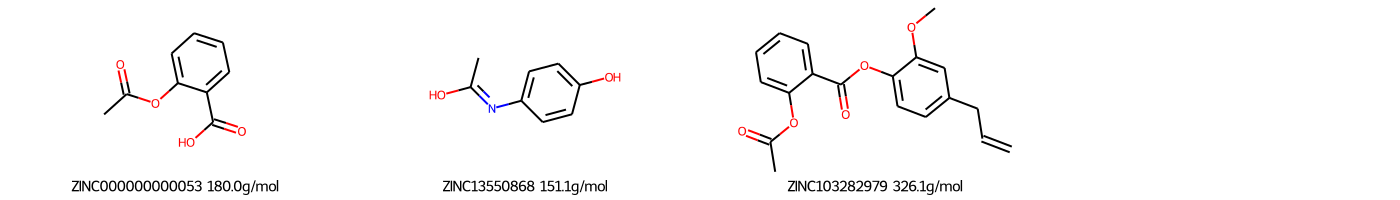

In [22]:
#@title **Using rdkit.Chem.Draw**
from rdkit.Chem import Draw

mollist=[]
with Chem.SmilesMolSupplier('data/Multiple_smiles.smi') as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mollist.append(mol) #store the molecules into mollist


#Include mol name and molecular weight for legend
prop_legends = [f"{mol.GetProp('_Name')} {Chem.rdMolDescriptors.CalcExactMolWt(mol):.1f}g/mol" for mol in mollist]

Draw.MolsToGridImage(mollist[:10], molsPerRow=4, subImgSize=(350, 200), legends=prop_legends)


The RDKit has some built-in functionality for creating images from molecules found in the rdkit.Chem.Draw package

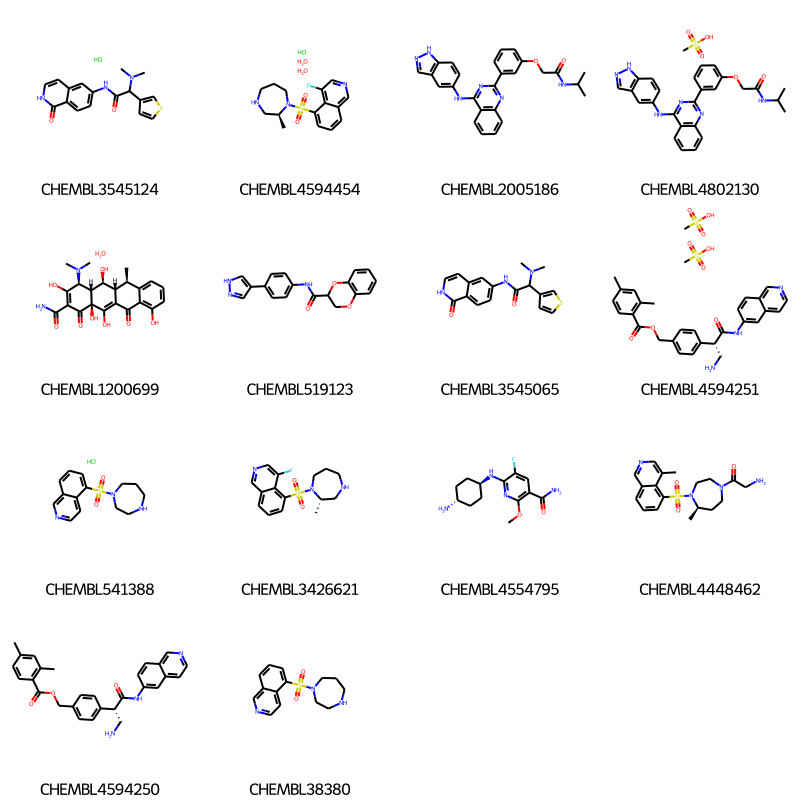

In [23]:
with Chem.SDMolSupplier('data/Multiple_SDF_compounds.sdf') as inputmol:
    mollist = [lig for lig in inputmol if lig is not None]
    for mol in mollist:
        AllChem.Compute2DCoords(mol)
#Draw.MolsToGridImage(mollist,molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in mollist])
Draw.MolsToGridImage(mollist,molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("chembl_id") for x in mollist])
# # To save as img file - showing error check it
# img = Draw.MolsToGridImage(mollist,molsPerRow=2,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in mollist])
# img.save('output/image_grid.png')

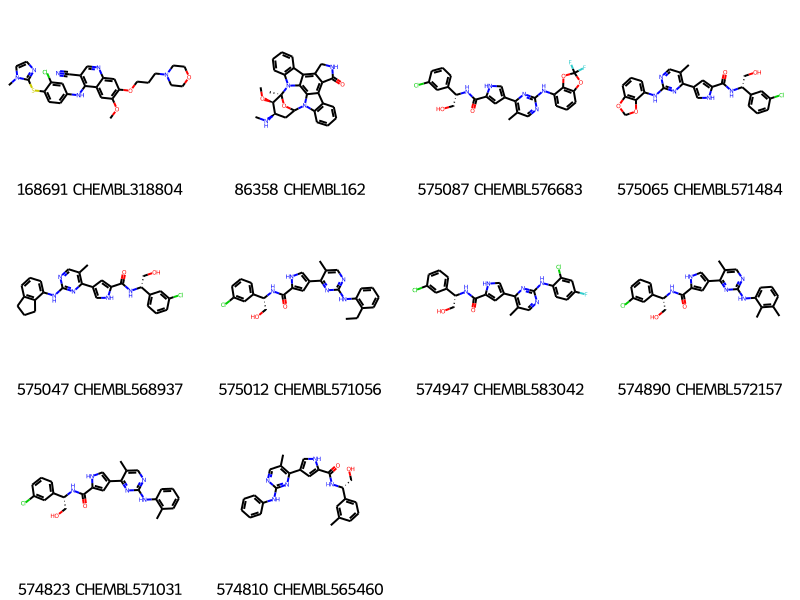

In [24]:
with Chem.SDMolSupplier('data/example_compounds.sdf') as inputmol:
    mollist = [lig for lig in inputmol if lig is not None]
    for mol in mollist:
        AllChem.Compute2DCoords(mol)
#Draw.MolsToGridImage(mollist,molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in mollist])
Draw.MolsToGridImage(mollist[:10],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in mollist[:10]])
# # To save as img file - showing error check it
# img = Draw.MolsToGridImage(mollist,molsPerRow=2,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in mollist])
# img.save('output/image_grid.png')

Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, and bonds likewise can have a coloured outline applied. An obvious use is to show atoms and bonds that have matched a substructure query

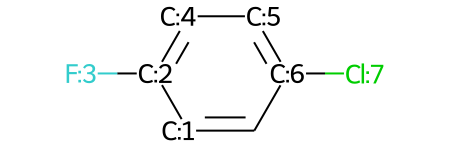

In [25]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
inputmol = Chem.MolFromSmiles('c1cc(F)ccc1Cl') #input molecule
pattern = Chem.MolFromSmarts('ClccccF') #pattern to search
mol_with_atom_index(inputmol)

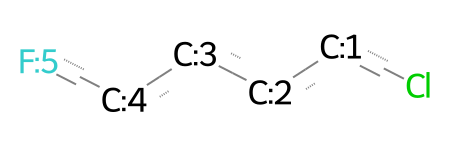

In [26]:
mol_with_atom_index(pattern)

In [27]:
hit_atoms = list(inputmol.GetSubstructMatch(pattern)) # Return atom index of inputmol matching the pattern
hit_atoms

[7, 6, 5, 4, 2, 3]

In [28]:
hit_bonds=[]
for bond in pattern.GetBonds():
    print(bond.GetBeginAtomIdx(),bond.GetEndAtomIdx(),hit_atoms[bond.GetBeginAtomIdx()])

0 1 7
1 2 6
2 3 5
3 4 4
4 5 2


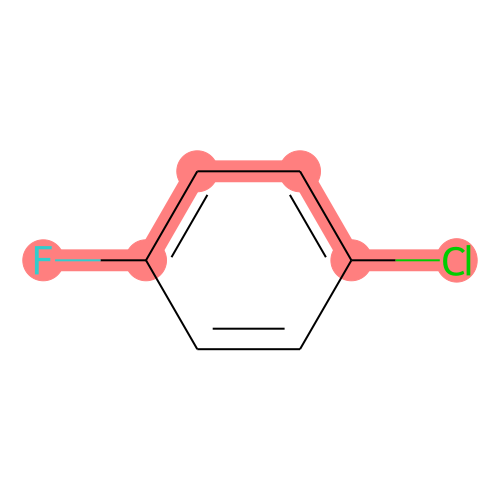

In [29]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
inputmol = Chem.MolFromSmiles('c1cc(F)ccc1Cl') #input molecule
pattern = Chem.MolFromSmarts('ClccccF') #pattern to search
hit_atoms = list(inputmol.GetSubstructMatch(pattern)) # Return atom index of inputmol matching the pattern
hit_bonds = []
for bond in pattern.GetBonds(): #Using bond from pattern getting atom index and searching against hit atoms index for creating bond to highlight
    aid1 = hit_atoms[bond.GetBeginAtomIdx()]
    aid2 = hit_atoms[bond.GetEndAtomIdx()]
    hit_bonds.append(inputmol.GetBondBetweenAtoms(aid1,aid2).GetIdx()) #bond index
drw = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(drw, inputmol, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
drw.FinishDrawing()
SVG(drw.GetDrawingText())

# Fingerprint

In RDKit, a molecular fingerprint is a binary vector that encodes the presence or absence of specific molecular features or substructures within a molecule. Fingerprinting is commonly used for comparing the similarity or dissimilarity of different molecules, for example in virtual screening or similarity searches.

RDKit supports various types of fingerprints, including the Morgan fingerprint (also known as the circular fingerprint), the extended-connectivity fingerprint (ECFP), and the MACCS keys fingerprint. These fingerprints differ in terms of their underlying algorithm and the specific molecular features they encode.

To generate a fingerprint for a given molecule in RDKit, the molecule is first processed to generate a list of substructures or features, which are then used to generate the binary fingerprint vector. This process can be customized to include or exclude specific features or adjust the size of the fingerprint vector.

Once generated, fingerprints can be compared using similarity metrics such as the Tanimoto similarity coefficient, which measures the overlap between two fingerprints. 

More information and description about fingerprint can be found [here](https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf).

## MACCS

The MACCS keys are a widely used set of 166 binary structural keys that encode various structural features of a molecule, such as presence or absence of certain functional groups, ring systems, and bond types. The resulting MACCS keys fingerprint is a binary vector that represents the presence or absence of each of the 166 keys in the molecule.

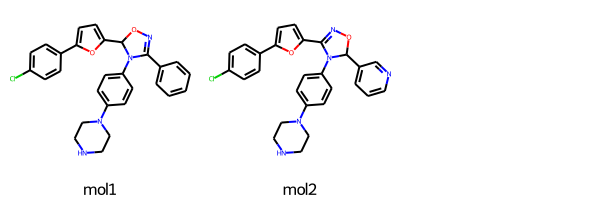

In [30]:
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs

mol1 = Chem.MolFromSmiles('Clc1ccc(-c2ccc(C3ON=C(c4ccccc4)N3c3ccc(N4CCNCC4)cc3)o2)cc1')
mol2 = Chem.MolFromSmiles('Clc1ccc(-c2ccc(C3=NOC(c4cccnc4)N3c3ccc(N4CCNCC4)cc3)o2)cc1') #,'C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12'
mollist=[mol1,mol2]
Draw.MolsToGridImage(mollist,legends=['mol1','mol2'])

In [31]:
fp1 = MACCSkeys.GenMACCSKeys(mol1)
fp2 = MACCSkeys.GenMACCSKeys(mol2)

In [32]:
fp1.ToBitString()

'00000000000000000000000010000000000000100000000000000000010000100000000110010111001101110001101111101011100100110000011111101100110001110110001001011011110011110111110'

In [33]:
DataStructs.FingerprintSimilarity(fp1,fp2)

0.9375

## ECFP4

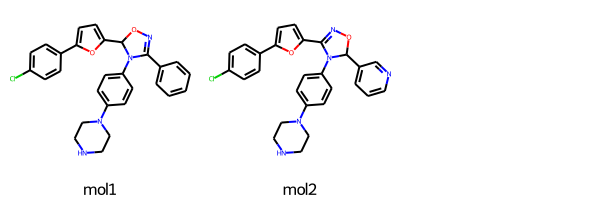

In [34]:
mol1 = Chem.MolFromSmiles('Clc1ccc(-c2ccc(C3ON=C(c4ccccc4)N3c3ccc(N4CCNCC4)cc3)o2)cc1')
mol2 = Chem.MolFromSmiles('Clc1ccc(-c2ccc(C3=NOC(c4cccnc4)N3c3ccc(N4CCNCC4)cc3)o2)cc1') #,'C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12'
mollist=[mol1,mol2]
Draw.MolsToGridImage(mollist,legends=['mol1','mol2'])


In [35]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, radius = 2)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, radius = 2)


In [36]:
fp1.ToBitString()

'000000000000000000000000010000000001000000000000000000000000000000000000000000000000000000000001000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100001000000000001000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000010000000000000000000000000000100000000001000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000010000000100000000000000000000000000000000000000000000000000000000000000000000000000010001000000000000000000000000000000100000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000100000000000100000000000000000000000000000000000000000000000010000000000000000000010100000001000000000000000000000000000001000000001000000000000000000000000000000000000000000000000000000000000000

In [37]:
DataStructs.FingerprintSimilarity(fp1,fp2)

0.6461538461538462

# Fragmenting molecules

## RECAP

RECAP module is used to break down a molecule into fragments and generate a hierarchical representation of the molecule's scaffold. This can be useful for analyzing and comparing the structures of related molecules. It breaks the molecules based on chemical transformations mimicking common reactions carried out in the lab in order to decompose a molecule into a series of reasonable fragments.




In [38]:
# These are the definitions that will be applied to fragment molecules:
reactionDefs = (
  "[#7;+0;D2,D3:1]!@C(!@=O)!@[#7;+0;D2,D3:2]>>[*][#7:1].[#7:2][*]", # urea

  "[C;!$(C([#7])[#7]):1](=!@[O:2])!@[#7;+0;!D1:3]>>[*][C:1]=[O:2].[*][#7:3]", # amide

  "[C:1](=!@[O:2])!@[O;+0:3]>>[*][C:1]=[O:2].[O:3][*]", # ester

  "[N;!D1;+0;!$(N-C=[#7,#8,#15,#16])](-!@[*:1])-!@[*:2]>>[*][*:1].[*:2][*]", # amines
  #"[N;!D1](!@[*:1])!@[*:2]>>[*][*:1].[*:2][*]", # amines

  # again: what about aromatics?
  "[#7;R;D3;+0:1]-!@[*:2]>>[*][#7:1].[*:2][*]", # cyclic amines

  "[#6:1]-!@[O;+0]-!@[#6:2]>>[#6:1][*].[*][#6:2]", # ether

  "[C:1]=!@[C:2]>>[C:1][*].[*][C:2]", # olefin

  "[n;+0:1]-!@[C:2]>>[n:1][*].[C:2][*]", # aromatic nitrogen - aliphatic carbon

  "[O:3]=[C:4]-@[N;+0:1]-!@[C:2]>>[O:3]=[C:4]-[N:1][*].[C:2][*]", # lactam nitrogen - aliphatic carbon

  "[c:1]-!@[c:2]>>[c:1][*].[*][c:2]", # aromatic carbon - aromatic carbon

  "[n;+0:1]-!@[c:2]>>[n:1][*].[*][c:2]", # aromatic nitrogen - aromatic carbon *NOTE* this is not part of the standard recap set.

  "[#7;+0;D2,D3:1]-!@[S:2](=[O:3])=[O:4]>>[#7:1][*].[*][S:2](=[O:3])=[O:4]", # sulphonamide
  )

In [39]:
from rdkit import Chem
from rdkit.Chem import Recap
ligand = Chem.MolFromSmiles('Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1')
recap_tree = Recap.RecapDecompose(ligand,minFragmentSize=0) # Fragmenting the ligand by RECAP rules
leaf = recap_tree.GetLeaves() #Getting leaves which are the terminal nodes of fragmentation of parent and children #https://future-chem.com/rdkit-recap/
g1_parent = []
g1_child = []

g2_parent = []
g2_child = []

g3_parent = []
g3_child = []

g4_child = []

for g1 in recap_tree.children.values():
  if g1.children:
    g1_parent.append(Chem.MolFromSmiles(g1.smiles))
    for g2 in g1.children.values():
      if g2.children:
        g2_parent.append(Chem.MolFromSmiles(g2.smiles))
        for g3 in g2.children.values():
          if g3.children:
            g3_parent.append(Chem.MolFromSmiles(g3.smiles))
            for g4 in g3.children.values():
              g4_child.append(Chem.MolFromSmiles(g4.smiles))
          else:
            g3_child.append(Chem.MolFromSmiles(g3.smiles))
      else:
        g2_child.append(Chem.MolFromSmiles(g2.smiles))
  else:
    g1_child.append(Chem.MolFromSmiles(g1.smiles))

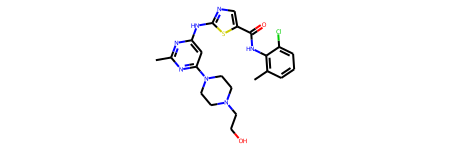

In [40]:
ligand

G1-child: 2 G1-parent: 6


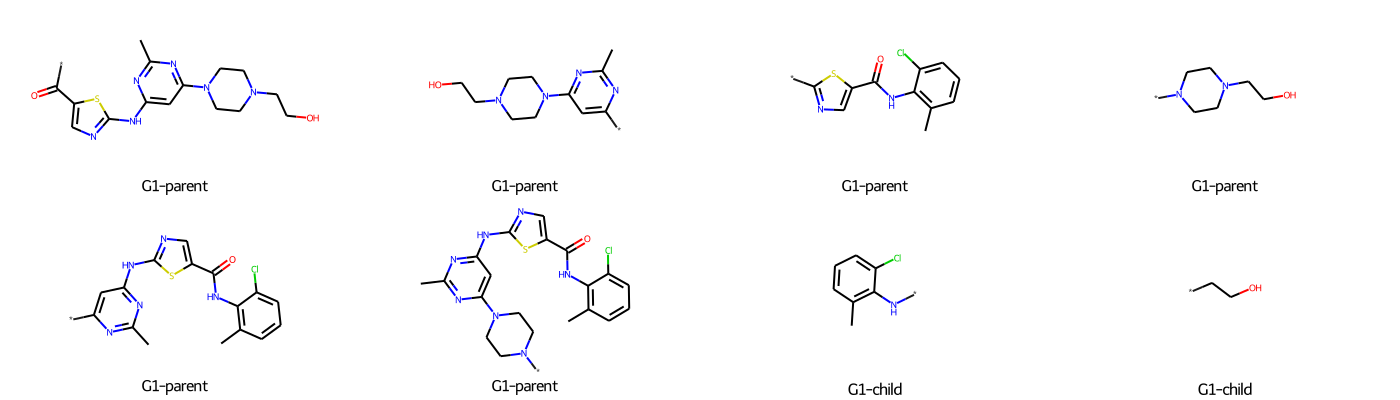

In [41]:
g1 = g1_parent + g1_child
prop_labels =[]
for f in range(len(g1_parent)):
    prop_labels.append('G1-parent') 
for f in range(len(g1_child)):
    prop_labels.append('G1-child')
print(f'G1-child: {len(g1_child)} G1-parent: {len(g1_parent)}')
Draw.MolsToGridImage(g1, molsPerRow=4, subImgSize=(350, 200),legends=prop_labels)


G2-child: 12 G2-parent: 12


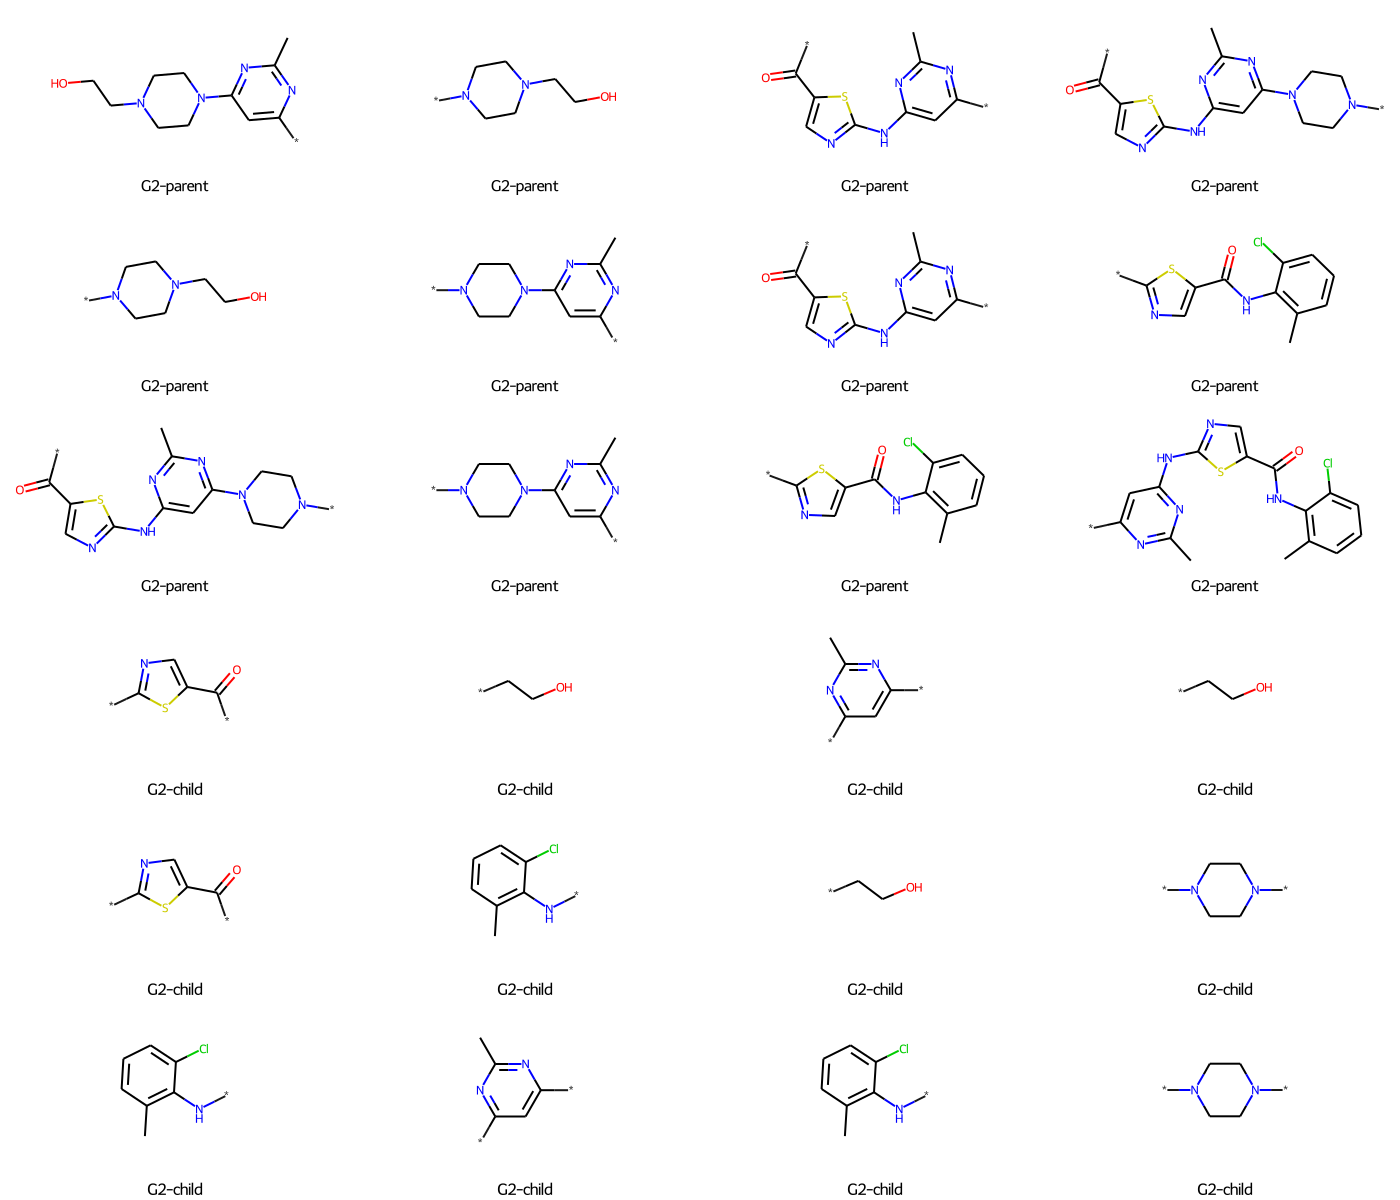

In [42]:
g2 = g2_parent + g2_child
prop_labels =[]
for f in range(len(g2_parent)):
    prop_labels.append('G2-parent') 
for f in range(len(g2_child)):
    prop_labels.append('G2-child')
print(f'G2-child: {len(g2_child)} G2-parent: {len(g2_parent)}')
Draw.MolsToGridImage(g2, molsPerRow=4, subImgSize=(350, 200),legends=prop_labels)


G3-child: 24 G3-parent: 8


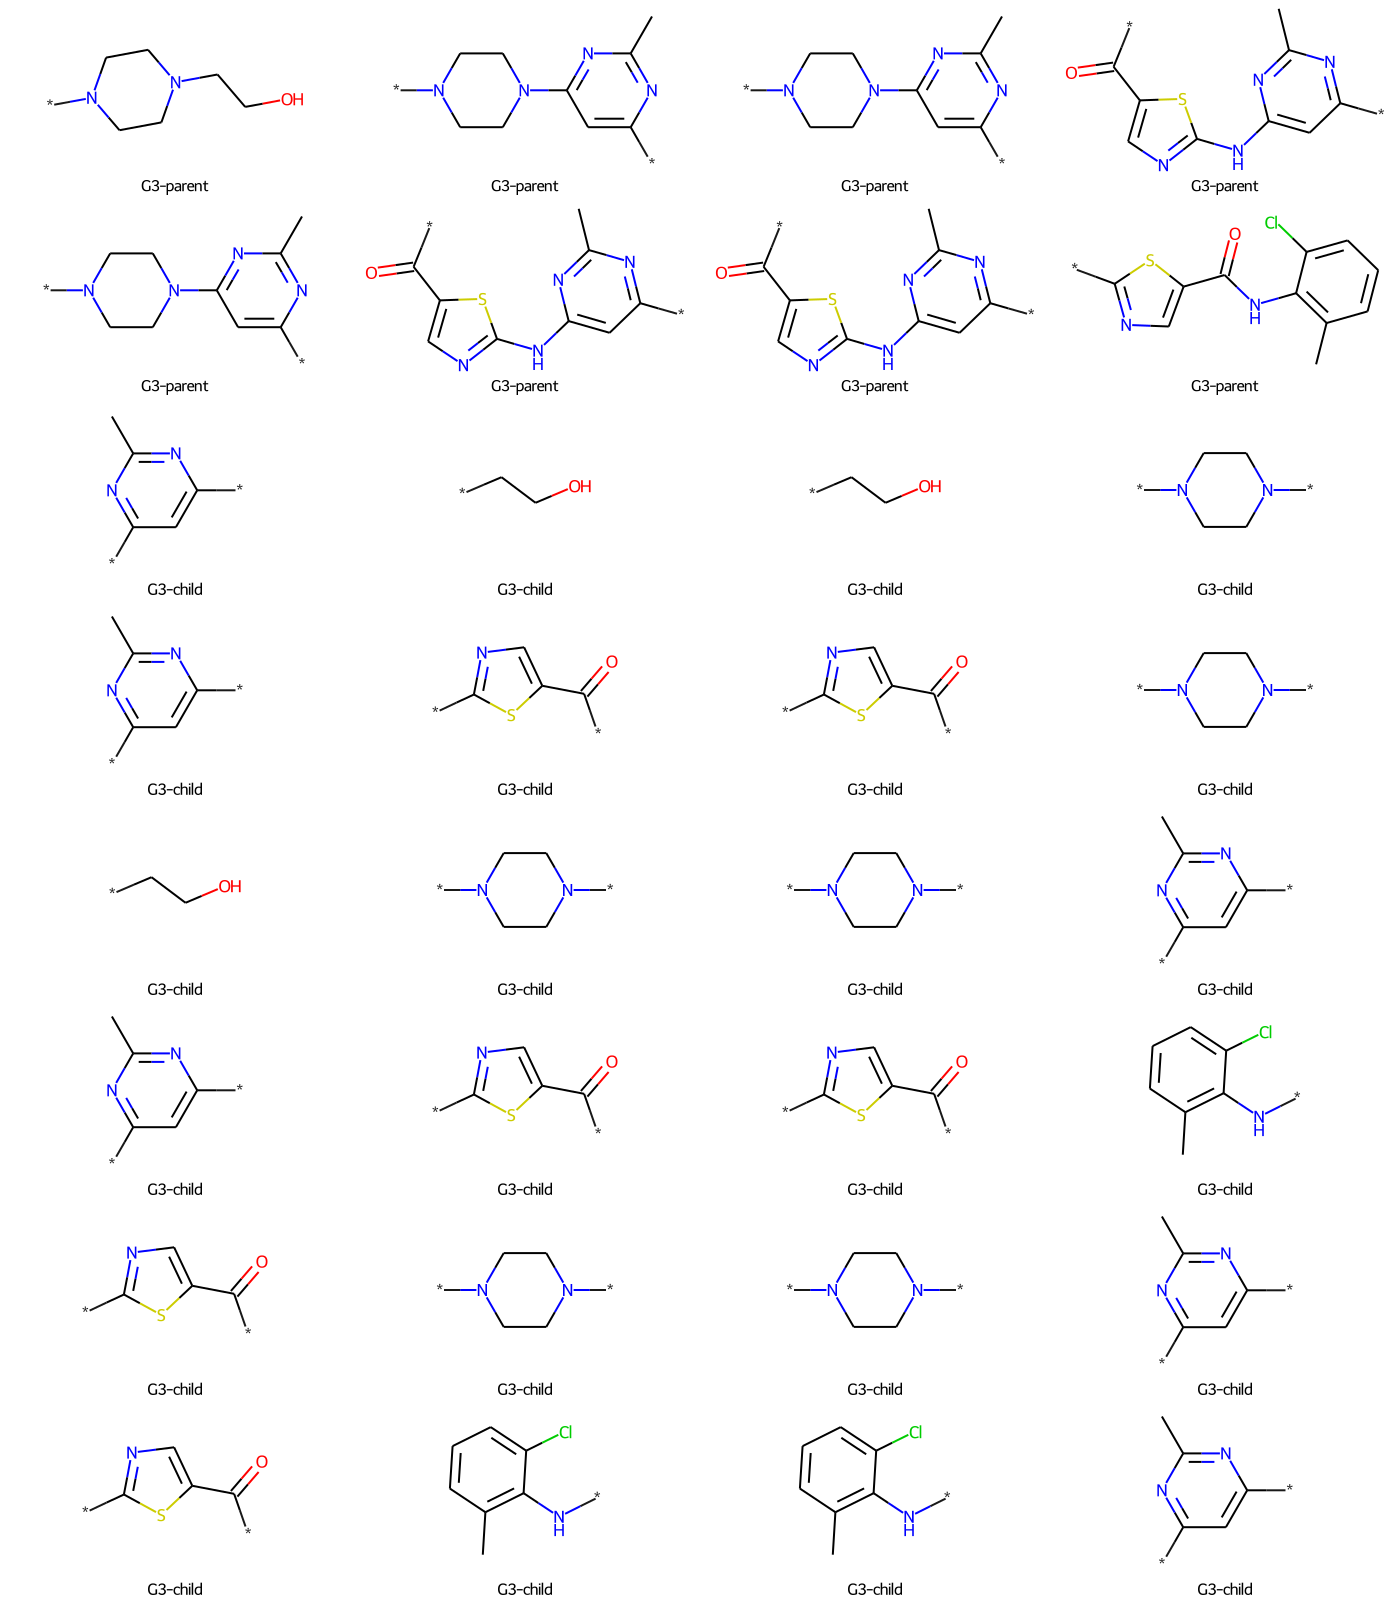

In [43]:
g3 = g3_parent + g3_child
prop_labels =[]
for f in range(len(g3_parent)):
    prop_labels.append('G3-parent') 
for f in range(len(g3_child)):
    prop_labels.append('G3-child')
print(f'G3-child: {len(g3_child)} G3-parent: {len(g3_parent)}')
Draw.MolsToGridImage(g3, molsPerRow=4, subImgSize=(350, 200),legends=prop_labels)

In [44]:
leaf = recap_tree.GetLeaves()
leaf

{'*Nc1c(C)cccc1Cl': <rdkit.Chem.Recap.RecapHierarchyNode at 0x1f4ddd18040>,
 '*C(=O)c1cnc(*)s1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x1f4ddd18370>,
 '*c1cc(*)nc(C)n1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x1f4ddd18490>,
 '*CCO': <rdkit.Chem.Recap.RecapHierarchyNode at 0x1f4ddd182b0>,
 '*N1CCN(*)CC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x1f4ddd18550>}

In [45]:
child = []
for g1 in g1_child:
    child.append(Chem.MolToSmiles(g1))
for g2 in g2_child:
    child.append(Chem.MolToSmiles(g2))
for g3 in g3_child:
    child.append(Chem.MolToSmiles(g3))
set(child)

{'*C(=O)c1cnc(*)s1',
 '*CCO',
 '*N1CCN(*)CC1',
 '*Nc1c(C)cccc1Cl',
 '*c1cc(*)nc(C)n1'}

## BRICS

BRICS provides another method for fragmenting molecules along synthetically accessible bonds:

In [46]:
# These are the definitions that will be applied to fragment molecules:
environs = {
  'L1':'[C;D3]([#0,#6,#7,#8])(=O)',
  # 
  # After some discussion, the L2 definitions ("N.pl3" in the original
  # paper) have been removed and incorporated into a (almost) general
  # purpose amine definition in L5 ("N.sp3" in the paper).
  #
  # The problem is one of consistency.
  #    Based on the original definitions you should get the following
  #    fragmentations:
  #      C1CCCCC1NC(=O)C -> C1CCCCC1N[2*].[1*]C(=O)C
  #      c1ccccc1NC(=O)C -> c1ccccc1[16*].[2*]N[2*].[1*]C(=O)C
  #    This difference just didn't make sense to us. By switching to
  #    the unified definition we end up with:
  #      C1CCCCC1NC(=O)C -> C1CCCCC1[15*].[5*]N[5*].[1*]C(=O)C
  #      c1ccccc1NC(=O)C -> c1ccccc1[16*].[5*]N[5*].[1*]C(=O)C
  #
  #'L2':'[N;!R;!D1;!$(N=*)]-;!@[#0,#6]',
  # this one turned out to be too tricky to define above, so we set it off
  # in its own definition:
  #'L2a':'[N;D3;R;$(N(@[C;!$(C=*)])@[C;!$(C=*)])]',
  'L3':'[O;D2]-;!@[#0,#6,#1]',
  'L4':'[C;!D1;!$(C=*)]-;!@[#6]',
  #'L5':'[N;!D1;!$(N*!-*);!$(N=*);!$(N-[!C;!#0])]-[#0,C]',
  'L5':'[N;!D1;!$(N=*);!$(N-[!#6;!#16;!#0;!#1]);!$([N;R]@[C;R]=O)]',
  'L6':'[C;D3;!R](=O)-;!@[#0,#6,#7,#8]',
  'L7a':'[C;D2,D3]-[#6]',
  'L7b':'[C;D2,D3]-[#6]',
  '#L8':'[C;!R;!D1]-;!@[#6]',
  'L8':'[C;!R;!D1;!$(C!-*)]',
  'L9':'[n;+0;$(n(:[c,n,o,s]):[c,n,o,s])]',
  'L10':'[N;R;$(N(@C(=O))@[C,N,O,S])]',
  'L11':'[S;D2](-;!@[#0,#6])',
  'L12':'[S;D4]([#6,#0])(=O)(=O)',
  'L13':'[C;$(C(-;@[C,N,O,S])-;@[N,O,S])]',
  'L14':'[c;$(c(:[c,n,o,s]):[n,o,s])]',
  'L14b':'[c;$(c(:[c,n,o,s]):[n,o,s])]',
  'L15':'[C;$(C(-;@C)-;@C)]',
  'L16':'[c;$(c(:c):c)]',
  'L16b':'[c;$(c(:c):c)]',
  }

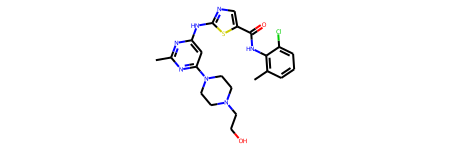

In [47]:
from rdkit.Chem import BRICS
ligand = Chem.MolFromSmiles('Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1')
ligand

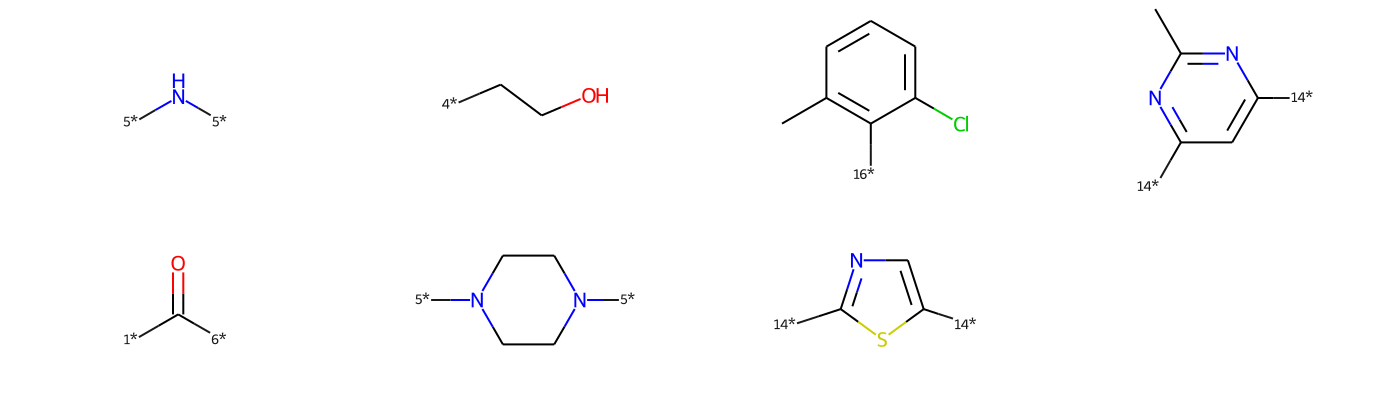

In [48]:
frags_smiles = BRICS.BRICSDecompose(ligand)
frags = [Chem.MolFromSmiles(f)for f in frags_smiles]
Draw.MolsToGridImage(frags, molsPerRow=4, subImgSize=(350, 200))

# Calculating descriptors

In cheminformatics, descriptors are numeric or categorical properties of a molecule that can be used to characterize and compare different compounds. These descriptors are often calculated based on the molecular structure, and can provide information on a variety of chemical properties, such as molecular size, shape, and polarity.

RDKit offers a wide range of descriptor calculation methods, which can be used to generate descriptors for a given molecule or set of molecules. These methods include both 1D descriptors, which are calculated based on the atom types and bond connectivity within a molecule, and 2D descriptors, which take into account the spatial arrangement of atoms in the molecule.

Some examples of the types of descriptors that can be calculated using RDKit include topological descriptors, such as the number of atoms and bonds in a molecule, as well as more complex descriptors, such as pharmacophoric and quantum chemical descriptors. These descriptors can be used in a variety of applications, including drug discovery, chemical reaction prediction, and toxicity prediction, among others.

1D descriptors: number of atoms, number of bonds, molecular weight, logP

2D descriptors: polarizability, electronegativity, and hydrogen bonding potential

3D descriptors: molecular volume, solvent-accessible surface area, moment of inertia, distance matrix

More information on available descriptors in rdkit is available [here](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors)


In [49]:
#@title **Descriptors**
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
ligand = Chem.MolFromSmiles('Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1')

In [50]:
#Individual properties
print('QED', Descriptors.qed(ligand))
print('MolWt', Descriptors.MolWt(ligand))
print('TPSA', Descriptors.TPSA(ligand))

QED 0.4657173060978848
MolWt 488.01700000000034
TPSA 106.50999999999999


In [51]:
for desc_name, desc_fun in Descriptors.descList: #Contains tuples of ('descriptor_name',descriptor_function)
  print(desc_name,desc_fun(ligand))

MaxEStateIndex 12.693081800261481
MinEStateIndex -0.2666136091002893
MaxAbsEStateIndex 12.693081800261481
MinAbsEStateIndex 0.17311797422773734
qed 0.4657173060978848
MolWt 488.01700000000034
HeavyAtomMolWt 461.8090000000002
ExactMolWt 487.15572175200003
NumValenceElectrons 174
NumRadicalElectrons 0
MaxPartialCharge 0.2669995457316883
MinPartialCharge -0.3950445481992146
MaxAbsPartialCharge 0.3950445481992146
MinAbsPartialCharge 0.2669995457316883
FpDensityMorgan1 1.2121212121212122
FpDensityMorgan2 2.0
FpDensityMorgan3 2.727272727272727
BCUT2D_MWHI 35.49569262790628
BCUT2D_MWLOW 10.173622896957431
BCUT2D_CHGHI 2.1915687606744543
BCUT2D_CHGLO -2.3471555825901467
BCUT2D_LOGPHI 2.2812254639844065
BCUT2D_LOGPLOW -2.470931023082427
BCUT2D_MRHI 7.171599304418788
BCUT2D_MRLOW 0.10254581742070304
BalabanJ 1.431592912890649
BertzCT 1111.4321707155357
Chi0 23.371668241257186
Chi0n 18.507134660004112
Chi0v 20.079560186950292
Chi1 15.92305529101951
Chi1n 10.658603284189198
Chi1v 11.85306433812615

In [52]:
#@title **3D-descriptors**
#@markdown More information for 3D descriptors can be found at [here](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors3D.html)
inputmol = Chem.MolFromSmiles('Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1') #Reading smiles from text
inputmol.SetProp('_Name','Dasatinib') #Setting molecule name
inputmol_H = Chem.AddHs(inputmol) #Adding H's for generating coordinates
AllChem.EmbedMolecule(inputmol_H) #Calculating 3D coordinate generation
AllChem.MMFFOptimizeMolecule(inputmol_H,maxIters=5000) #For minimization
print('Asphericity',Chem.Descriptors3D.Asphericity(inputmol_H))
print('Eccentricity',Chem.Descriptors3D.Eccentricity(inputmol_H))
print('InertialShapeFactor',Chem.Descriptors3D.InertialShapeFactor(inputmol_H))
print('NPR1',Chem.Descriptors3D.NPR1(inputmol_H))
print('NPR2',Chem.Descriptors3D.NPR1(inputmol_H))
print('PMI1',Chem.Descriptors3D.PMI1(inputmol_H))
print('PMI2',Chem.Descriptors3D.PMI2(inputmol_H))
print('PMI3',Chem.Descriptors3D.PMI3(inputmol_H))
print('RadiusOfGyration',Chem.Descriptors3D.RadiusOfGyration(inputmol_H))
print('SpherocityIndex',Chem.Descriptors3D.SpherocityIndex(inputmol_H))

Asphericity 0.783818478444132
Eccentricity 0.9968910469601284
InertialShapeFactor 0.0006684222925827602
NPR1 0.07879238853302359
NPR2 0.07879238853302359
PMI1 1465.71623023416
PMI2 18224.954531683412
PMI3 18602.25660781748
RadiusOfGyration 6.263640315448071
SpherocityIndex 0.09650294365144833


# Reading as pandas dataframe

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Molecule
0,CHEMBL2036604,NaN,None,563.06,2,6.36,21,Clc1ccc(-c2ccc(C3=NOC(c4ccc(-c5cncnc5)cc4)N3c3...,IC50,'=',100.0,nM,7.00,NaN,NaN,UO_0000065,12.43,0.23,0.64,8.86,0,CHEMBL2040538,Inhibition of MK2 using 5TAMRA-KKLNRTLSVA-COOH...,B,BAO_0000357,single protein format,None,None,None,None,None,NaN,NaN,NaN,CHEMBL2208,MAP kinase-activated protein kinase 2,Homo sapiens,SINGLE PROTEIN,CHEMBL2034849,1,Scientific Literature,ACS Med Chem Lett,2012,None,NaN,
1,CHEMBL1801380,NaN,None,428.49,0,3.34,10I,O=C1NCc2[nH]c3c(ccc4cnc(-c5cccc(OCCN6CCOCC6)c5...,IC50,'=',1280.0,nM,5.89,NaN,NaN,UO_0000065,13.75,0.25,2.55,7.41,0,CHEMBL1805903,Inhibition of MK2 in human THP-1 cells assesse...,B,BAO_0000219,cell-based format,Homo sapiens,None,None,THP-1,None,NaN,NaN,NaN,CHEMBL2208,MAP kinase-activated protein kinase 2,Homo sapiens,SINGLE PROTEIN,CHEMBL1800003,1,Scientific Literature,Bioorg Med Chem Lett,2010,CHEMBL3307574,NaN,
2,CHEMBL253881,NaN,None,535.56,1,3.61,10j,NC1CCN(Cc2ccn3ncnc(Oc4ccc(NC(=O)NC(=O)Cc5ccc(F...,IC50,'>',5000.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,0,CHEMBL928653,Inhibition of MK2,B,BAO_0000357,single protein format,None,None,None,None,None,NaN,NaN,NaN,CHEMBL2208,MAP kinase-activated protein kinase 2,Homo sapiens,SINGLE PROTEIN,CHEMBL1141528,1,Scientific Literature,Bioorg Med Chem Lett,2008,None,NaN,
3,CHEMBL4568087,NaN,None,421.53,0,2.86,19,Cn1cc(-c2cnc3c(-c4csc(C(=O)N[C@@H]5CCCC[C@@H]5...,IC50,'=',390.0,nM,6.41,NaN,NaN,UO_0000065,15.20,0.29,3.55,6.21,0,CHEMBL4479749,Inhibition of full-length recombinant human Hi...,B,BAO_0000019,assay format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL2208,MAP kinase-activated protein kinase 2,Homo sapiens,SINGLE PROTEIN,CHEMBL4477252,1,Scientific Literature,Bioorg Med Chem Lett,2016,None,NaN,
4,CHEMBL1783671,NaN,None,307.81,0,2.51,6a,Cc1ccccc1NC(=S)NCc1nc(Cl)cnc1N,IC50,'=',3600.0,nM,5.44,NaN,NaN,UO_0000065,17.69,0.37,2.93,7.18,0,CHEMBL1786602,Inhibition of MK2 using biotin-LCAYSRALSRQLSSG...,B,BAO_0000357,single protein format,None,None,None,None,None,NaN,NaN,NaN,CHEMBL2208,MAP kinase-activated protein kinase 2,Homo sapiens,SINGLE PROTEIN,CHEMBL1782048,1,Scientific Literature,Bioorg Med Chem Lett,2009,None,NaN,

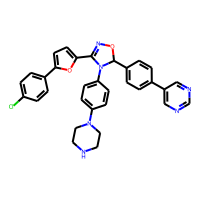
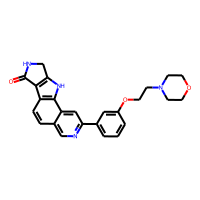
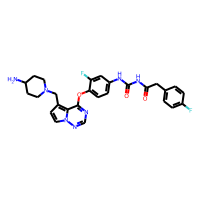
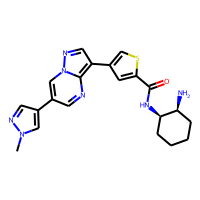
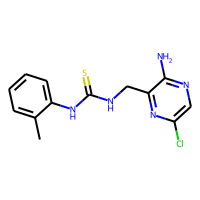

In [53]:
from rdkit.Chem import PandasTools
import pandas as pd
from IPython.core.display import HTML

df = pd.read_csv('data/MAPK2_chembl.csv',sep=';')
PandasTools.AddMoleculeColumnToFrame(df,'Smiles','Molecule')
PandasTools.RenderImagesInAllDataFrames(images=True)
HTML(df.head().to_html(notebook=True))

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Molecule
49,CHEMBL122617,1-NAPHTHOL,None,144.17,0,2.55,1-naphthol,Oc1cccc2ccccc12,IC50,'>',100000.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,0,CHEMBL1027395,Inhibition of human recombinant MK2 expressed ...,B,BAO_0000019,assay format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL2208,MAP kinase-activated protein kinase 2,Homo sapiens,SINGLE PROTEIN,CHEMBL1140089,1,Scientific Literature,J Med Chem,2008,None,NaN,
226,CHEMBL57481,NaN,None,145.16,0,1.94,5-hydroxyisoquinoline,Oc1cccc2cnccc12,IC50,'=',85000.0,nM,4.07,NaN,NaN,UO_0000065,28.04,0.51,2.13,12.29,0,CHEMBL1027395,Inhibition of human recombinant MK2 expressed ...,B,BAO_0000019,assay format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL2208,MAP kinase-activated protein kinase 2,Homo sapiens,SINGLE PROTEIN,CHEMBL1140089,1,Scientific Literature,J Med Chem,2008,None,NaN,
836,CHEMBL198022,NaN,None,181.22,0,1.03,8a,Cc1n[nH]c2sc(C(N)=O)cc12,IC50,'>',20000.0,nM,NaN,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,0,CHEMBL864558,Inhibitory activity against MK2,B,BAO_0000357,single protein format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL2208,MAP kinase-activated protein kinase 2,Homo sapiens,SINGLE PROTEIN,CHEMBL1148538,1,Scientific Literature,Bioorg Med Chem Lett,2006,None,NaN,

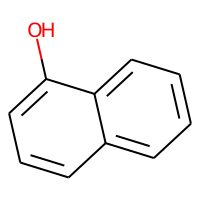
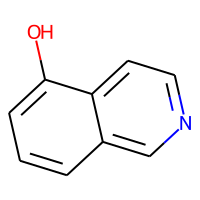
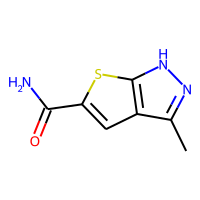

In [54]:
#Filter the dataframe and view the content
HTML(df[df['Molecular Weight'] < 200].to_html(notebook=True))

# Maximum common substructure

MCS (Maximum Common Substructure) is a commonly used algorithm in cheminformatics for identifying the largest common substructure among a set of molecules. In RDKit, the ***rdkit.Chem.rdFMCS*** module provides a function ***FindMCS*** to calculate the MCS of a set of molecules. 

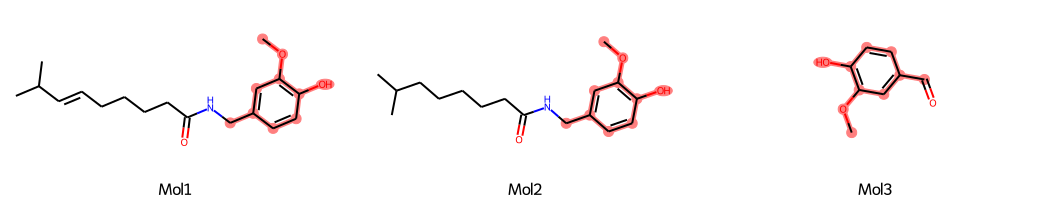

In [55]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C") #molecule 1
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC") #molecule 2
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1") #molecule3
mols = [mol1,mol2,mol3] #molecule list
res=rdFMCS.FindMCS(mols) #Find MCS
res.numAtoms #number of Atoms match
res.numBonds #number of bonds match
res.canceled #Algorithm time out or not
res.smartsString #SMARTS string of mcs match
pattern_match = Chem.MolFromSmarts(res.smartsString)
#mols.append(Chem.MolFromSmarts(res.smartsString))
prop_labels=['Mol1','Mol2','Mol3']
highlight_mcs = [mol.GetSubstructMatch(pattern_match) for mol in mols]
Draw.MolsToGridImage(mols,subImgSize=(350,200),highlightAtomLists = highlight_mcs, legends=prop_labels)

# Substructure match

Substructure matching is the process of finding substructures (i.e., patterns) within a molecule that match a given query pattern. Substructure matching can be used for a variety of tasks in cheminformatics, including **identifying compounds that contain a particular functional group or substructure, filtering a set of molecules based on a specific pattern, and identifying potential toxicophores or structural alerts in a dataset**.

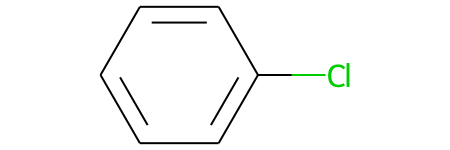

In [56]:
#pattern = Chem.MolFromSmiles('N1C=CC=N1')
pattern = Chem.MolFromSmiles('ClC1=CC=CC=C1')
pattern

In [57]:
matches = []
with Chem.SmilesMolSupplier('data/MAPK2.smi') as inputmol: #load input file
    for mol in inputmol:
        if mol.HasSubstructMatch(pattern): #Check if the pattern is available in the input molecules
            matches.append(mol) #Store in the pattern matching ligands
print('Total ligands having match:', len(matches)) 

Total ligands having match: 12


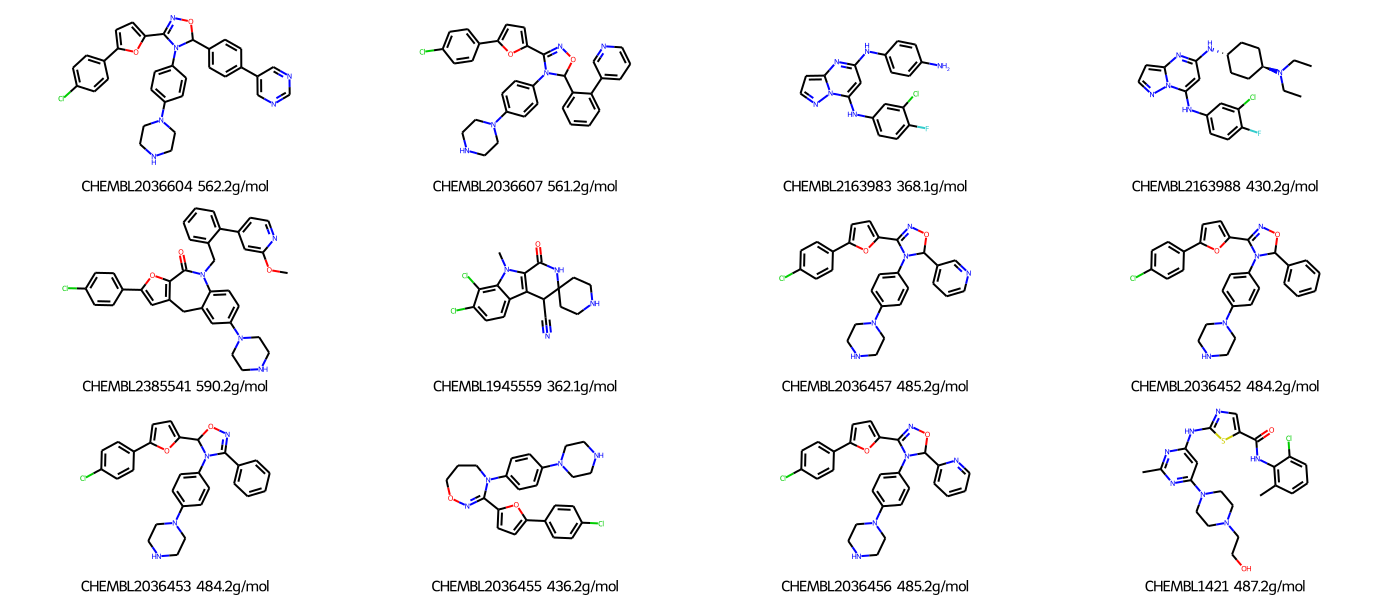

In [58]:
#Include mol name and molecular weight
prop_legends = [f"{mol.GetProp('_Name')} {Chem.rdMolDescriptors.CalcExactMolWt(mol):.1f}g/mol" for mol in matches]

Draw.MolsToGridImage(matches, molsPerRow=4, subImgSize=(350, 200), legends=prop_legends)

### Sterochemistry in substructures

By default information about stereochemistry is not used in substructure searches. useChirality can be used to set sterochemistry based pattern search.

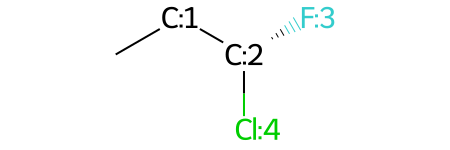

In [59]:
mol = Chem.MolFromSmiles('CC[C@H](F)Cl')
mol_with_atom_index(mol)

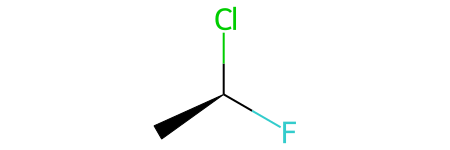

In [60]:
Chem.MolFromSmiles('C[C@H](F)Cl')

In [61]:
mol.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'))

True

In [62]:
mol.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'),useChirality=True)

True

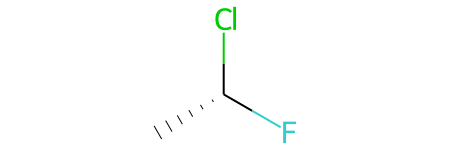

In [63]:
Chem.MolFromSmiles('C[C@@H](F)Cl')

In [64]:
mol.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'))

True

In [65]:
mol.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'),useChirality=True)

False

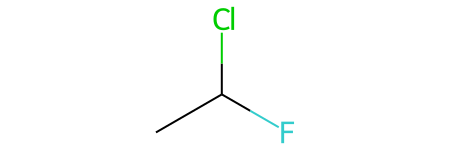

In [66]:
Chem.MolFromSmiles('CC(F)Cl')

In [67]:
mol.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'))

True

In [68]:
mol.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'),useChirality=True)

True

Notice that when useChirality is set a non-chiral query does match a chiral molecule. The same is not true for a chiral query and a non-chiral molecule:

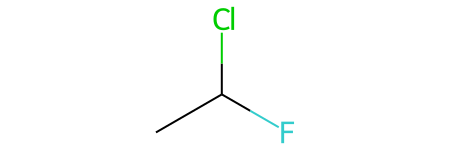

In [69]:
Chem.MolFromSmiles('CC(F)Cl')

In [70]:
mol.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'))

True

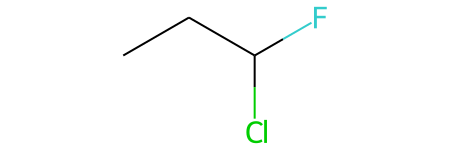

In [71]:
mol2 = Chem.MolFromSmiles('CCC(F)Cl')
mol2

In [72]:
mol2.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'),useChirality=True)

False

# Synthetic accessibility

Synthetic accessibility is a measure of how easy or difficult it is to synthesize a given molecule using established chemical methods.  SAscores can be useful for prioritizing compounds for synthesis and for identifying potentially problematic structures that may be difficult or costly to synthesize.The SA_score ranges from 1 to 10, with higher scores indicating greater synthetic accessibility.

In [73]:
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score')) #Load SA_score from rdkit contrib
# now you can import sascore!
import sascorer 
mol = Chem.MolFromSmiles('Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1') #Load molecule
s = sascorer.calculateScore(mol)
print('SA_score:',s)

SA_score: 2.649762485659984


# Clustering molecules

In [74]:
from rdkit import DataStructs

from rdkit.ML.Cluster import Butina

#Multiple smiles
mollist=[]
with Chem.SmilesMolSupplier('data/MAPK2.smi') as inputmol: #inputmol has all molecules object
    for mol in inputmol: #mol has each molecule object
        if mol is None: continue #To check mol empty or not(read properly or not)
        mollist.append(mol)
len(mollist)

50

In [75]:
fps = [] #Store fingerprint of all the molecules

for mol in mollist:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2) #Calculte ECFP4 fingerprint
    fps.append(fp)

In [76]:
len(fps)

50

In [77]:
distance_matrix = [] #Store distance matrix
for i, fp in enumerate(fps):
  similarities = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i+1]) #Calculate taniomoto similarity between vectors
  distance_matrix.extend([1-sim for sim in similarities])

In [78]:
clusters = Butina.ClusterData(distance_matrix, len(fps), 0.2, isDistData=True)

[00:43:14] WARNING: Distance matrix is too long



In [79]:
for id,clust in enumerate(clusters):
  print(f"cluster-id: {id}",clust)

cluster-id: 0 (41, 37, 40, 42)
cluster-id: 1 (31, 29, 30, 32)
cluster-id: 2 (48, 47, 49)
cluster-id: 3 (46, 45)
cluster-id: 4 (44, 43)
cluster-id: 5 (39, 38)
cluster-id: 6 (36, 35)
cluster-id: 7 (34, 33)
cluster-id: 8 (28, 27)
cluster-id: 9 (26, 25)
cluster-id: 10 (24, 23)
cluster-id: 11 (22, 21)
cluster-id: 12 (20, 19)
cluster-id: 13 (18, 17)
cluster-id: 14 (16, 15)
cluster-id: 15 (14, 13)
cluster-id: 16 (12, 11)
cluster-id: 17 (10, 9)
cluster-id: 18 (8, 7)
cluster-id: 19 (6, 5)
cluster-id: 20 (4, 3)
cluster-id: 21 (2, 1)
cluster-id: 22 (0,)


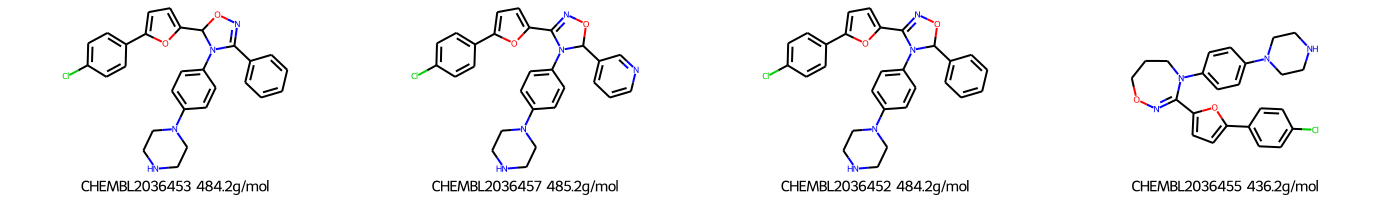

In [80]:
#View the cluster-0
cluster0 = [mollist[f] for f in clusters[0]]
prop_legends = [f"{mol.GetProp('_Name')} {Chem.rdMolDescriptors.CalcExactMolWt(mol):.1f}g/mol" for mol in cluster0]
Draw.MolsToGridImage(cluster0, molsPerRow=4, subImgSize=(350, 200), legends=prop_legends)

# Bond order PDB

In [81]:
template_lig = Chem.MolFromSmiles('COc1cc2c(cc1OCCCN3CCOCC3)/C(=N/c4ccc(c(c4)Cl)F)/N=CN2') #Gefitinib
input_pdb = Chem.MolFromPDBFile('data/lig.pdb')

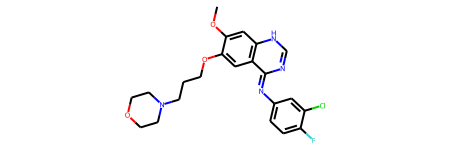

In [82]:
template_lig

In [83]:
mols2grid.display([input_pdb],size=(400,400))

MolGridWidget()

In [84]:
new_lig = AllChem.AssignBondOrdersFromTemplate(template_lig,input_pdb) #This function will add bond order from template mol
mols2grid.display([new_lig],size=(400,400))

[00:43:16] WARNING: More than one matching pattern found - picking one



MolGridWidget()

# Join two molecule

molzip lets you take a molecule containing multiple fragments and “zip” them together. The atoms which should be bonded in the final molecule are labelled by connecting them to dummy atoms. The code identifies matching dummy atoms (by default this means dummies with the same isotopic label) in the fragments, adds bonds between the atoms connected to the dummies, and then removes the dummies.

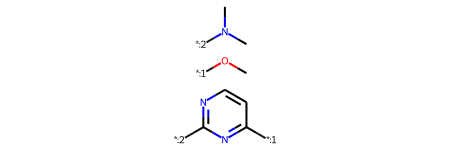

In [85]:
sample = Chem.MolFromSmiles('[*:1]c1nc([*:2])ncc1.CO[*:1].[*:2]N(C)C')
sample

Frag1 has dummy atom labelled [\*:2]

Frag2 has dummy atom labelled [\*:1]

Frag3 has two dummy atoms labelled [\*:1] and [\*:2].

Now the molzip will take the fragments frag1 and combine to frag3 by search dummy atom labels [\*:1]

similary frag2 is attached to frag3 by searching dummy atom label [\*:2].

By specifying at which particular point the fragments to be connected by the dummy atom labelling the molecules could be combined.

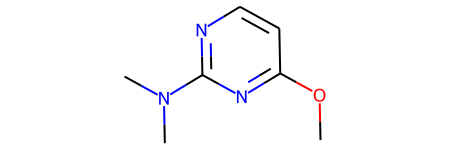

In [86]:
Chem.molzip(sample)